## Inprocessing - Adversial Debiasing  -  Compas Model
- for 'sex' and 'race'

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.insert(0, project_root)

import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import reset_default_graph
import pandas as pd
from src.data_loading import load_adult_sex, load_adult_race
from src.modeling import adversial_debiasing_train_and_predict
from src.metrics import compute_metrics, compare_viz_metrics_2x3
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.datasets import BinaryLabelDataset
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_di

In [2]:
baseline_race_agg = pd.read_csv('../../reports/baseline_agg/adult_race_metrics_agg.csv', index_col=0)
baseline_sex_agg = pd.read_csv('../../reports/baseline_agg/adult_sex_metrics_agg.csv', index_col=0)

--------------------------------------------------------------------------------------------------------------------------------------

## default adversial debiaser, race

In [3]:
# 1) Retrieve data
protected           = 'race'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_race()  
feature_cols = [c for c in df.columns if c not in ('label','race')]

# 2) Run experiment, Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for i, (train_idx, test_idx) in enumerate(sss.split(df, df['label'])):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
    df,
    train_idx,
    test_idx,
    protected,
    privileged_value,
    unprivileged_value,
    privileged_groups,
    unprivileged_groups,
    scope_name='adv',           
    num_epochs=50,
    batch_size=128,
    adversary_loss_weight=0.1)
    
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate
adult_race_metrics = pd.DataFrame(results)
adult_race_metrics_agg = adult_race_metrics.agg(['mean','std'])
print(adult_race_metrics_agg)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2025-05-20 21:32:46.427504: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


epoch 0; iter: 0; batch classifier loss: 16.681690; batch adversarial loss: 0.900612
epoch 0; iter: 200; batch classifier loss: 2.634743; batch adversarial loss: 0.750224
epoch 1; iter: 0; batch classifier loss: 5.411049; batch adversarial loss: 0.725157
epoch 1; iter: 200; batch classifier loss: 2.225876; batch adversarial loss: 0.618025
epoch 2; iter: 0; batch classifier loss: 1.619228; batch adversarial loss: 0.592903
epoch 2; iter: 200; batch classifier loss: 3.601415; batch adversarial loss: 0.512157
epoch 3; iter: 0; batch classifier loss: 2.465281; batch adversarial loss: 0.510030
epoch 3; iter: 200; batch classifier loss: 0.663907; batch adversarial loss: 0.492371
epoch 4; iter: 0; batch classifier loss: 2.034355; batch adversarial loss: 0.519680
epoch 4; iter: 200; batch classifier loss: 1.923033; batch adversarial loss: 0.507665
epoch 5; iter: 0; batch classifier loss: 1.307237; batch adversarial loss: 0.410921
epoch 5; iter: 200; batch classifier loss: 1.132911; batch advers

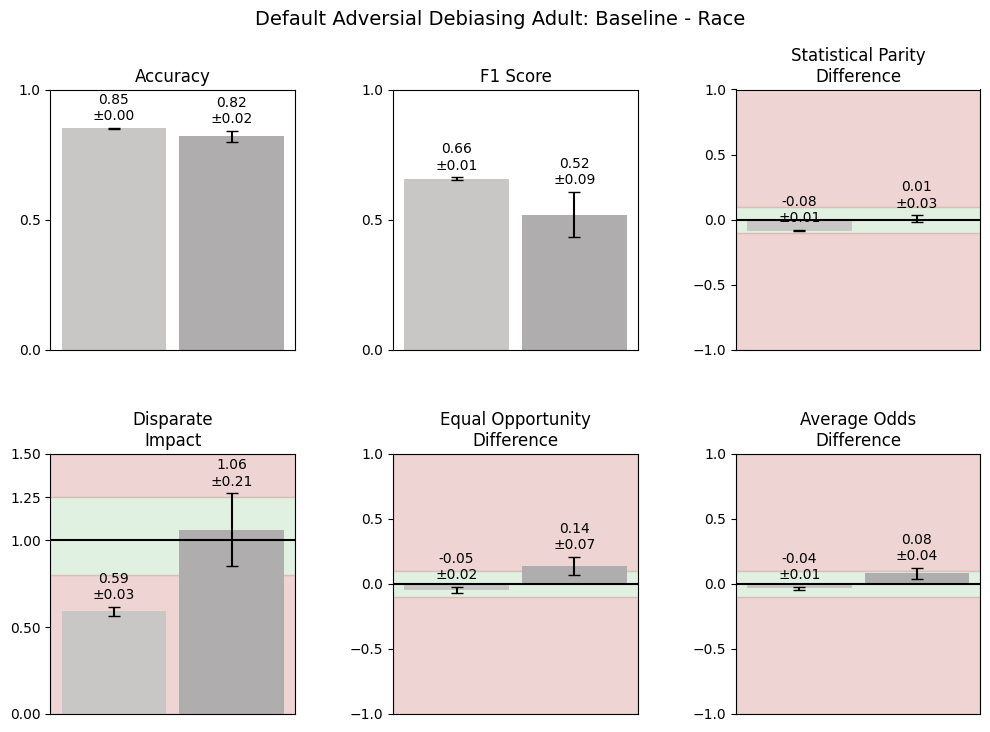

In [4]:
compare_viz_metrics_2x3(baseline_race_agg, adult_race_metrics_agg, 'Baseline', 'Race', 'Default Adversial Debiasing Adult: Baseline - Race')

## default adversial debiaser, sex

In [5]:
# 1) Retrieve data
protected           = 'sex'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_sex()  
feature_cols = [c for c in df.columns if c not in ('label','sex')]

# 2) Run experiment, Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for i, (train_idx, test_idx) in enumerate(sss.split(df, df['label'])):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
    df,
    train_idx,
    test_idx,
    protected,
    privileged_value,
    unprivileged_value,
    privileged_groups,
    unprivileged_groups,
    scope_name='adv',           
    num_epochs=50,
    batch_size=128,
    adversary_loss_weight=0.1)
    
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate
adult_sex_metrics = pd.DataFrame(results)
adult_sex_metrics_agg = adult_sex_metrics.agg(['mean','std'])
print(adult_race_metrics_agg)

epoch 0; iter: 0; batch classifier loss: 10.719220; batch adversarial loss: 0.653934
epoch 0; iter: 200; batch classifier loss: 5.535931; batch adversarial loss: 0.674039
epoch 1; iter: 0; batch classifier loss: 9.397532; batch adversarial loss: 0.657341
epoch 1; iter: 200; batch classifier loss: 4.852560; batch adversarial loss: 0.654549
epoch 2; iter: 0; batch classifier loss: 11.071877; batch adversarial loss: 0.697256
epoch 2; iter: 200; batch classifier loss: 1.763735; batch adversarial loss: 0.647708
epoch 3; iter: 0; batch classifier loss: 4.819965; batch adversarial loss: 0.601127
epoch 3; iter: 200; batch classifier loss: 3.276618; batch adversarial loss: 0.682499
epoch 4; iter: 0; batch classifier loss: 2.981311; batch adversarial loss: 0.626493
epoch 4; iter: 200; batch classifier loss: 5.110703; batch adversarial loss: 0.663583
epoch 5; iter: 0; batch classifier loss: 1.047821; batch adversarial loss: 0.575429
epoch 5; iter: 200; batch classifier loss: 1.263878; batch adver

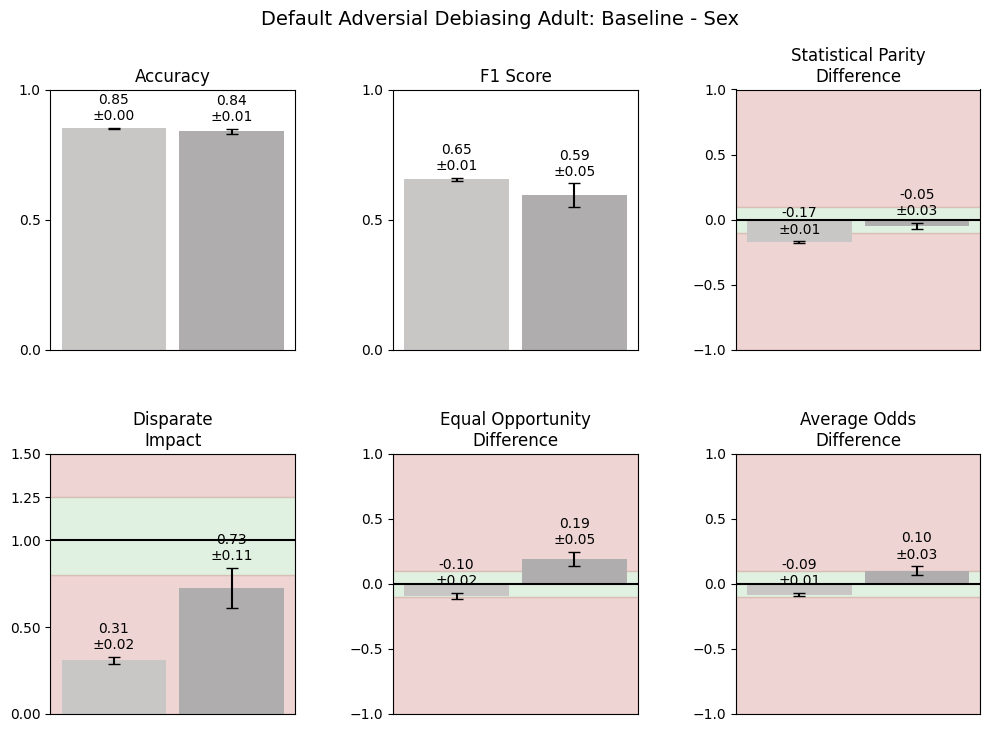

In [6]:
compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Sex', 'Default Adversial Debiasing Adult: Baseline - Sex')

## hyperparameter search adversial debiaser, race

In [7]:
import pandas as pd
from sklearn.model_selection import ParameterGrid, StratifiedShuffleSplit, StratifiedKFold
from src.metrics import best_hyperparameter_advdeb

# 1) Retrieve data
protected           = 'race'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_race()  
feature_cols = [c for c in df.columns if c not in ('label','race')]

# 2) Hyperparameter Search
param_grid = {
    'adversary_loss_weight': [0.5, 1.0],
    'num_epochs':            [10, 20, 50],
    'batch_size':            [64, 128]
}
grid = list(ParameterGrid(param_grid))

grid_results = []
# Perform hyperparameter search with 15 stratified shuffle splits
for params in grid:
    print(f"Testing config: {params}")
    fold_metrics = []
    sss = StratifiedShuffleSplit(n_splits=15, test_size=0.2, random_state=42)

    for train_idx, test_idx in sss.split(df, df['label']):
        test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
            df, train_idx, test_idx,
            protected, privileged_value, unprivileged_value,
            privileged_groups, unprivileged_groups,
            scope_name='adv',
            num_epochs=params['num_epochs'],
            batch_size=params['batch_size'],
            adversary_loss_weight=params['adversary_loss_weight']
        )
        m = compute_metrics(
            test_df, y_test, y_pred,
            protected, privileged_value, unprivileged_value
        )
        fold_metrics.append(m)
    
    df_fm = pd.DataFrame(fold_metrics)
    agg = df_fm.agg(['mean', 'std'])
    
    grid_results.append({
        **params,
        'acc_mean':   agg.loc['mean', 'accuracy'],
        'acc_std':    agg.loc['std',  'accuracy'],
        'f1_mean':    agg.loc['mean', 'f1_score'],
        'f1_std':     agg.loc['std',  'f1_score'],
        'SPD_mean':   agg.loc['mean', 'SPD'],
        'SPD_std':    agg.loc['std',  'SPD'],
        'DI_mean':    agg.loc['mean', 'DI'],
        'DI_std':     agg.loc['std',  'DI'],
        'EOD_mean':   agg.loc['mean', 'EOD'],
        'EOD_std':    agg.loc['std',  'EOD'],
        'AOD_mean':   agg.loc['mean', 'AOD'],
        'AOD_std':    agg.loc['std',  'AOD'],
    })

results_df = pd.DataFrame(grid_results)

# 3) Hyperparameter Selection
best_param = best_hyperparameter_advdeb(results_df)
print(f"Best parameters: {best_param}")

# Final evaluation with StratifiedKFold
loss_weight = best_param['adversary_loss_weight']
n_epochs    = int(best_param['num_epochs'])
batch_sz    = int(best_param['batch_size'])

# 4) Run experiment, Evaluate
results = []
folds = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)

for train_idx, test_idx in folds.split(df, df['label']):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
        df, train_idx, test_idx,
        protected, privileged_value, unprivileged_value,
        privileged_groups, unprivileged_groups,
        scope_name='adv',
        num_epochs=n_epochs,
        batch_size=batch_sz,
        adversary_loss_weight=loss_weight
    )
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)
    
# 5) Aggregate results
adult_race_metrics = pd.DataFrame(results)
adult_race_metrics_agg = adult_race_metrics.agg(['mean','std'])
print(adult_race_metrics_agg)

Testing config: {'adversary_loss_weight': 0.5, 'batch_size': 64, 'num_epochs': 10}
epoch 0; iter: 0; batch classifier loss: 11.202388; batch adversarial loss: 0.645773
epoch 0; iter: 200; batch classifier loss: 3.869604; batch adversarial loss: 0.546782
epoch 0; iter: 400; batch classifier loss: 8.335328; batch adversarial loss: 0.527901
epoch 0; iter: 600; batch classifier loss: 14.498314; batch adversarial loss: 0.507898
epoch 1; iter: 0; batch classifier loss: 0.397023; batch adversarial loss: 0.491184
epoch 1; iter: 200; batch classifier loss: 1.533347; batch adversarial loss: 0.438787
epoch 1; iter: 400; batch classifier loss: 5.130083; batch adversarial loss: 0.422949
epoch 1; iter: 600; batch classifier loss: 0.733338; batch adversarial loss: 0.467993
epoch 2; iter: 0; batch classifier loss: 0.524937; batch adversarial loss: 0.401172
epoch 2; iter: 200; batch classifier loss: 2.750088; batch adversarial loss: 0.440327
epoch 2; iter: 400; batch classifier loss: 0.718974; batch ad

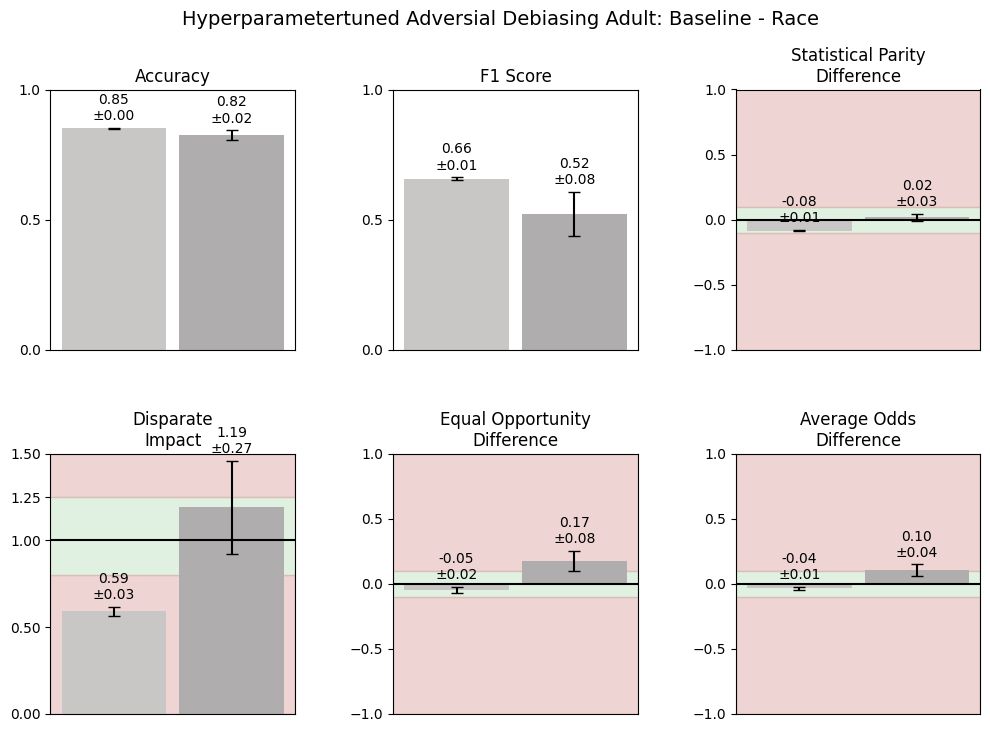

In [8]:
compare_viz_metrics_2x3(baseline_race_agg, adult_race_metrics_agg, 'Baseline', 'Race', 'Hyperparametertuned Adversial Debiasing Adult: Baseline - Race')

## hyperparameter search adversial debiaser, sex

In [9]:
import pandas as pd
from sklearn.model_selection import ParameterGrid, StratifiedShuffleSplit, StratifiedKFold
from src.metrics import best_hyperparameter_advdeb

# 1) Retrieve data
protected           = 'sex'
privileged_value    = 1.0
unprivileged_value  = 0.0
privileged_groups   = [{protected: privileged_value}]
unprivileged_groups = [{protected: unprivileged_value}]

tf.disable_v2_behavior()
ds, df = load_adult_sex()  
feature_cols = [c for c in df.columns if c not in ('label','sex')]

# 2) Hyperparameter Search
param_grid = {
    'adversary_loss_weight': [0.5, 1.0],
    'num_epochs':            [10, 20, 50],
    'batch_size':            [64, 128]
}
grid = list(ParameterGrid(param_grid))

grid_results = []
# Perform hyperparameter search with 15 stratified shuffle splits
for params in grid:
    print(f"Testing config: {params}")
    fold_metrics = []
    sss = StratifiedShuffleSplit(n_splits=15, test_size=0.3, random_state=42)

    for train_idx, test_idx in sss.split(df, df['label']):
        test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
            df, train_idx, test_idx,
            protected, privileged_value, unprivileged_value,
            privileged_groups, unprivileged_groups,
            scope_name='adv',
            num_epochs=params['num_epochs'],
            batch_size=params['batch_size'],
            adversary_loss_weight=params['adversary_loss_weight']
        )
        m = compute_metrics(
            test_df, y_test, y_pred,
            protected, privileged_value, unprivileged_value
        )
        fold_metrics.append(m)
    
    df_fm = pd.DataFrame(fold_metrics)
    agg = df_fm.agg(['mean', 'std'])

    grid_results.append({
        **params,
        'acc_mean':   agg.loc['mean', 'accuracy'],
        'acc_std':    agg.loc['std',  'accuracy'],
        'f1_mean':    agg.loc['mean', 'f1_score'],
        'f1_std':     agg.loc['std',  'f1_score'],
        'SPD_mean':   agg.loc['mean', 'SPD'],
        'SPD_std':    agg.loc['std',  'SPD'],
        'DI_mean':    agg.loc['mean', 'DI'],
        'DI_std':     agg.loc['std',  'DI'],
        'EOD_mean':   agg.loc['mean', 'EOD'],
        'EOD_std':    agg.loc['std',  'EOD'],
        'AOD_mean':   agg.loc['mean', 'AOD'],
        'AOD_std':    agg.loc['std',  'AOD'],
    })

results_df = pd.DataFrame(grid_results)

# 3) Hyperparameter Selection
best_param = best_hyperparameter_advdeb(results_df)
print(f"Best parameters: {best_param}")

# Final evaluation with StratifiedKFold
loss_weight = best_param['adversary_loss_weight']
n_epochs    = int(best_param['num_epochs'])
batch_sz    = int(best_param['batch_size'])

# 4) Run experiment, Evaluate
results = []
folds = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)

for train_idx, test_idx in folds.split(df, df['label']):
    test_df, y_test, y_pred = adversial_debiasing_train_and_predict(
        df, train_idx, test_idx,
        protected, privileged_value, unprivileged_value,
        privileged_groups, unprivileged_groups,
        scope_name='adv',
        num_epochs=n_epochs,
        batch_size=batch_sz,
        adversary_loss_weight=loss_weight
    )
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 5) Aggregate results
adult_sex_metrics       = pd.DataFrame(results)
adult_sex_metrics_agg   = adult_sex_metrics.agg(['mean','std'])
print(adult_sex_metrics_agg)

Testing config: {'adversary_loss_weight': 0.5, 'batch_size': 64, 'num_epochs': 10}
epoch 0; iter: 0; batch classifier loss: 25.771790; batch adversarial loss: 0.833647
epoch 0; iter: 200; batch classifier loss: 3.460274; batch adversarial loss: 0.837948
epoch 0; iter: 400; batch classifier loss: 5.854748; batch adversarial loss: 0.687311
epoch 1; iter: 0; batch classifier loss: 9.761111; batch adversarial loss: 0.616297
epoch 1; iter: 200; batch classifier loss: 4.855860; batch adversarial loss: 0.653524
epoch 1; iter: 400; batch classifier loss: 6.527667; batch adversarial loss: 0.602765
epoch 2; iter: 0; batch classifier loss: 3.862137; batch adversarial loss: 0.699010
epoch 2; iter: 200; batch classifier loss: 12.679238; batch adversarial loss: 0.591481
epoch 2; iter: 400; batch classifier loss: 4.127738; batch adversarial loss: 0.605022
epoch 3; iter: 0; batch classifier loss: 1.010226; batch adversarial loss: 0.724721
epoch 3; iter: 200; batch classifier loss: 5.852661; batch adve

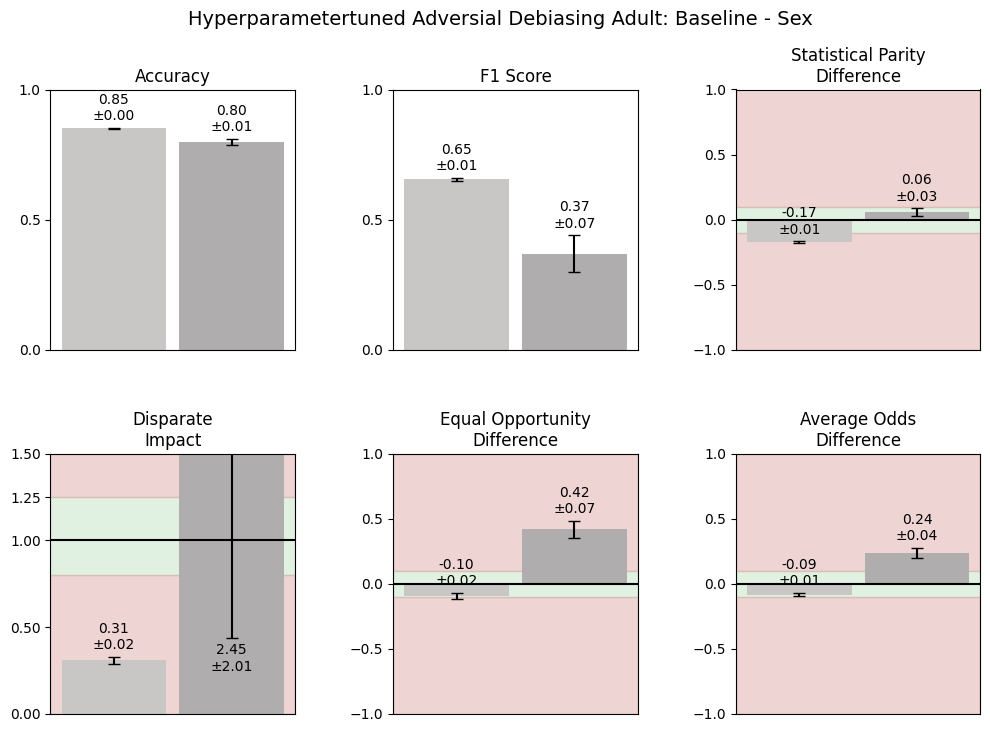

In [10]:
compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Sex', 'Hyperparametertuned Adversial Debiasing Adult: Baseline - Sex')